<div id="container" style="position:relative;">
<div style="float:left"><h1> Stats and Politics 2 </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />

### Prepared by : Eduardo Melo

## Summary
_______________________________________________________________________________________________________________________________
### 0. Preliminary step: importing libraries and csv files

### 1.  Analysis part 2: Understanding the voting trends

#### 1.1 Question 1 (broken down in 3 sub-questions)

- 1.1.1 Which data columns are correlated with the Republican vote share? 

- 1.1.2 Which columns are not? 

- 1.1.3 Does this pattern appear in all 3 elections we have data for?

#### 1.2 Question 2 (broken down in 3 sub-questions)
    
- 1.2.1  How are the racial demographics correlated with Republican vote share? 
   
- 1.2.2 Is there any race which is consistently correlated with the Republican vote share? 
    
- 1.2.3 Are these correlations statistically significant?
   
   
##### 1.3 Question 3 (broken down in 3 sub-questions)
- 1.3.1 Create 2 new dataframes: one containing only counties in California, the other containing only counties in Texas. Do the nationwide patterns that you found in the previous question still hold in these particular states? 
    
- 1.3.2 Which races remain positively (or negatively) correlated with a political party in each state? 
    
- 1.3.3 Are there races in California or Texas that have different correlations than the national trends?

### 2. Analysis Part 3 : Visualization and Statistically driven conclusions

#### 2.1 Question 1 (broken down in 5 sub-questions)

- 2.1.1 At a county level visualize the percentage share of the Republican votes in each election. 

- 2.1.2 What visualization method is most appropriate for this task? (We are asking for three plots, one for each election.) 

- 2.1.3 What are some of the similarities and differences between the 3 elections?



#### 2.2 Question 2
    
- 2.2.1  Repeat this exercise but now aggregate the data at a state level. (So instead of finding the vote share of a party within a county, find the vote share of a party within a state. Note: You might need to re-calculate the relative vote share for a state to take into account the different populations of each county.) Has your answer changed about the similarity of the 3 elections?
   
   
   
##### 2.3 Question 3
- 2.3.1 Look back at the non-aggregated county-level data. Conduct one or more statistical tests to see whether the mean Republican party vote share across all of the counties are different for the 3 elections (Which statistical test is appropriate here? Assume that the people who voted in each county are a representative sample of its population.) Describe why you’ve chosen your tests and interpret your results.

## Introduction
- Each question of the current assignment has been properly identified and answered.
- Additional queries, although not required, were executed, for practicing purposes. 

In [1]:
import numpy as np
import pandas as pd
import glob
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import cm

In [2]:
data = pd.read_csv('data/data_clean.csv')
votes = pd.read_csv('data/votes_clean.csv')

**Approach:**
- Two csv files were provided, the information requested  for the queries requires that these two files be merged. Therefore, the first action to start analyzing the available data.

In [3]:
data_votes = pd.merge(data, votes, on='Fips')

### 1.  Analysis part 2: Understanding the voting trends

#### 1.1 Question 1 (broken down in 3 sub-questions)

Answered for each sub-question after the heatmap

**Approach:**
 - Provide a visual idea of strong correlations through a heatmap
 - Show the correlation matrix for the republicans vote share
 
**Coding:**

- Prepared a function to call a heatmap and help visualize the strongest correlations within the dataframe. 
- The subsequent jupyter notebook cell is a call for the newly created function.

**Results:**
- Although a great tool, due to the number of columns in the dataframe, it is still hard to have a clear idea of good correlations.
- Due to their complementary nature, Democrat (%) and Republicans(%) have an expected strong negative correlation(not clear due to the absolute numbers).
- Continuing, a correlation matrix shows the R2 and the p-value for each pair of variables at each election year. 

In [4]:
def heatMap(df, mirror):
    
   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots(figsize=(12, 12))
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
 
   if mirror == True:
      #Generate Heat Map, numbers turned into absolute values for clearer visualization
      sns.heatmap(np.correl(corr), cmap=colormap, annot=False)
  
    #Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      #Apply yticks
      plt.yticks(rep_pct, corr.columns)
      
   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(np.abs(corr), cmap=colormap, annot=False,  mask=dropSelf)
        #fmt=".2f",removed due to visual polution
      # Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      # Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
   # show plot
   plt.show()

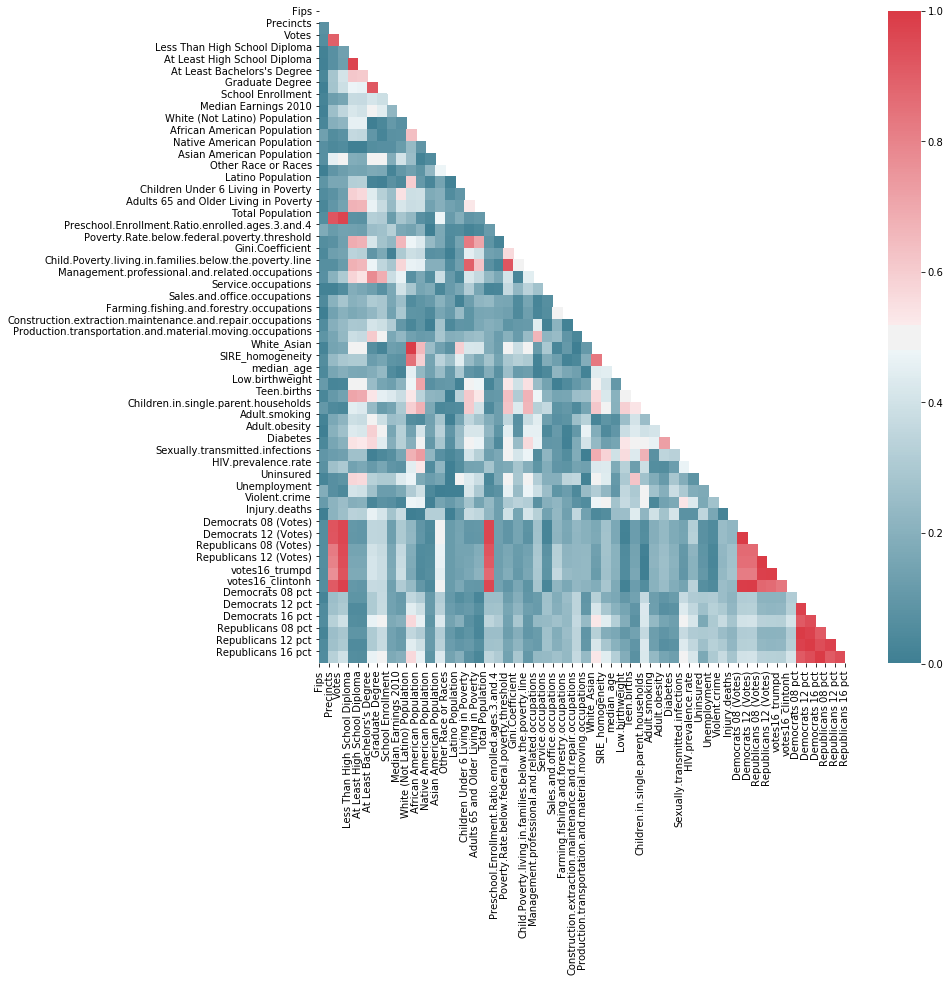

In [5]:
heatMap(data_votes,'True')

**Approach:**
 - Prepare a correlation matrix that shows not only the R2 but also the p-values, determining whether or not the results are relevant and strong enough.
 - Since more than one query will rely on the results of correlation matrices, two specific functions were prepared.
 - To include all the information in a single table per query, the results of each correlation matrix is merged into a new table.
 
**Coding:**

- Prepared two functions, one that creates a correlation matrix for the p-values for each pair of variables and election year, and another one which creates  a similar table for the R2 values.
- Executed each of the functions using the merged dataframe **(data_votes)** and created two tables, one with p-values and another with R2 values.
- From the recently created tables, select only the  columns with Republicans 08 pct, Republicans 12 pct, Republicans 16 pct using **.loc** .
- Merged the two tables together using **.join**.
- included a visualization tool in the table using **style.bar** to facilitate visual identification of stronger correlations.

**Results:**
- Since some categorical variables are nominal(State, ST, County) and their result would be at best misleading, they were not considered.
- Regarding p-values, we could say that the **following variables were not significant:**

- 2008: Fips, Adults over 65 and living in poverty
- 2012: None (all significant at 0.05)
- 2016: Adults over 65 and living in poverty

- Significant pair of variable:
- 2008: All pair of variables besides Fips, Adults over 65 and living in poverty
- 2012: All significant at 0.05
- 2016: All pair of variables besides,Adults over 65 and living in poverty

**Regarding Correlation values:**

- Considering values either higher than 0.3 or lower than -0.3, the following variables had a strong correlation with:

**Positive:**

Republicans 08 pct: 
- White (not latino) population, Construction.extraction.maintenance.and.repair.occupations, White_Asian, Uninsured,  Republicans 12 pct, Republicans 16 pct

Republicans 12 pct: 
- White (not latino) population, Construction.extraction.maintenance.and.repair.occupations, White_Asian,  Republicans 08 pct, Republicans 16 pct	

Republicans 16 pct: 
- White (not latino) population, Construction.extraction.maintenance.and.repair.occupations, White_Asian, SIRE_homogeneity, median_age,  Republicans 12 pct, Republicans 08 pct.

**Negative:**

Republicans 08 pct: 
- at least bachelor's degree, Graduate degree, African American,Asian American Population, Children.in.single.parent.households, Sexually.transmitted.infections, HIV.prevalence.rate, Unemployment, Democrats 08 pct, Democrats 12 pct, Democrats 16 pct

Republicans 12 pct: 
- at least bachelor's degree, Graduate degree, African American,Asian American Population, Children.in.single.parent.households, Sexually.transmitted.infections, HIV.prevalence.rate, Unemployment, votes, violent crime, Democrats 08 pct, Democrats 12 pct, Democrats 16 pct

Republicans 16 pct: 
- at least bachelor's degree, Graduate degree, African American,Asian American Population, Children.in.single.parent.households, Sexually.transmitted.infections, HIV.prevalence.rate, Unemployment, votes, Total population, violent crime, Democrats 08 pct, Democrats 12 pct, Democrats 16 pct


**Conclusions:**

- **1.1.1 Which data columns are correlated with the Republican vote share?** 
    - Columns are identified above, with a detailed description, considering only those who passed the p-value
- **1.1.2 Which columns are not?** 
    - Columns are identified above, with a detailed description, considering only those who passed the p-value

- **1.1.3 Does this pattern appear in all 3 elections we have data for?**
    - Very few columns don't repeat their patterns accross the three elections and are only relevant in one or two elections, these are:
        - **For negative correlation:** votes, violent crime, Total population.
        - **For positive correlation:** SIRE_homogeneity, median_age.


In [6]:
from scipy.stats import pearsonr

def calculate_pvalues(data_votes):
    df = data_votes._get_numeric_data()
    dfcols = pd.DataFrame(columns=data_votes.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(data_votes[r], data_votes[c])[1],4)
            
    return pvalues


In [7]:
p_values = calculate_pvalues(data_votes)

In [8]:
def calculate_correl(data_votes):
    df = data_votes._get_numeric_data()
    dfcols = pd.DataFrame(columns=data_votes.columns)
    pcorrel = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pcorrel[r][c] = round(pearsonr(data_votes[r], data_votes[c])[0],3)
    return pcorrel



In [9]:
elections_correl=calculate_correl(data_votes)

In [10]:
corr_table=elections_correl.loc[:, ['Republicans 08 pct', 'Republicans 12 pct', 'Republicans 16 pct']]

corr_table=corr_table.rename({'Republicans 08 pct':'Rep 08 pct (corr)', 'Republicans 12 pct': 'Rep 12 pct (corr)', 'Republicans 16 pct': 'Rep 16 pct (corr)'}, axis='columns')

pval_table=p_values.loc[:, ['Republicans 08 pct', 'Republicans 12 pct', 'Republicans 16 pct']]

pval_table=pval_table.rename({'Republicans 08 pct': 'Rep 08 pct (p-val)', 'Republicans 12 pct': 'Rep 12 pct (p-val)', 'Republicans 16 pct': 'Rep 16 pct (p-val)'}, axis='columns')



In [11]:
Pearson_table=pval_table.join(corr_table)

Pearson_table=Pearson_table[['Rep 08 pct (p-val)','Rep 08 pct (corr)', 'Rep 12 pct (p-val)','Rep 12 pct (corr)', 'Rep 16 pct (p-val)',
         'Rep 16 pct (corr)']]
Pearson_table=Pearson_table.apply(pd.to_numeric)

In [12]:
Pearson_table.set_index(["Rep 08 pct (p-val)"], inplace = True, 
                    append = True, drop = True) 

# resetting index 
Pearson_table.reset_index(inplace = True) 
Pearson_table.rename(columns={'level 0':'variable'}, 
                 inplace=True)  
#renaming the new column to variable
Pearson_table.rename(columns={'level_0':'variable'}, 
                 inplace=True)  

In [13]:
Pearson_table.style.bar(subset=['Rep 08 pct (corr)','Rep 12 pct (corr)', 'Rep 16 pct (corr)' ],align='mid',color=['#d65f5f', '#5fba7d']).set_caption('Table 1. Highlighted Pearson Corr Values')

,variable,Rep 08 pct (p-val),Rep 08 pct (corr),Rep 12 pct (p-val),Rep 12 pct (corr),Rep 16 pct (p-val),Rep 16 pct (corr)
0,State,nan,nan,nan,nan,nan,nan
1,ST,nan,nan,nan,nan,nan,nan
2,Fips,0.1931,0.023,0.0056,0.05,0.0021,0.055
3,County,nan,nan,nan,nan,nan,nan
4,Precincts,0,-0.256,0,-0.267,0,-0.33
5,Votes,0,-0.289,0,-0.303,0,-0.395
6,Less Than High School Diploma,0,0.088,0.0048,0.051,0.0008,0.06
7,At Least High School Diploma,0,-0.087,0.0062,-0.049,0.002,-0.055
8,At Least Bachelors's Degree,0,-0.307,0,-0.306,0,-0.466
9,Graduate Degree,0,-0.37,0,-0.372,0,-0.519


#### 1.2 Question 2 (broken down in 3 sub-questions)
    
- 1.2.1  How are the racial demographics correlated with Republican vote share? 
   
- 1.2.2 Is there any race which is consistently correlated with the Republican vote share? 
    
- 1.2.3 Are these correlations statistically significant?

**Approach:**
 - Based on the previous table created, we selected the desired fields to prepare this one, related to racial demographics.
 
**Coding:**

- Used the **.loc** function to select the range of desired variables 
- Dropped unnecessary variables inside the previous selection using **.drop** 
- included a visualization tool in the table using **style.bar** to facilitate visual identification of stronger correlations.

**Results**:

- 1.2.1:
    - It's split, the minorities tended to vote against the Republican party (Negative correlation) while White (Not Latino) population voted favorably.

- 1.2.2: 
    - White (Not Latino) population had a positive correlation the same for White Asian(which is majoritarily composed by the White population).
    - African Americans and Asian American population made the most consistent racial oposition, with correlation values higher lower than -0.3 (Negatively correlated). The remaining races shown a weak trend towards voting against the Republican party. 

- 1.2.3
    - **Regarding p-values**, All correlation analysis results were significant at p <0.05


In [14]:
racial_demographics=Pearson_table.loc[12:31,:]
racial_demographics = racial_demographics.drop([18,19,21,22,23,24,25,26,27,28,29,30], axis=0)
racial_demographics.style.bar(subset=['Rep 08 pct (corr)','Rep 12 pct (corr)', 'Rep 16 pct (corr)' ],align='mid',color=['#d65f5f', '#5fba7d']).set_caption('Table 2. Racial Demographics Correlation')

,variable,Rep 08 pct (p-val),Rep 08 pct (corr),Rep 12 pct (p-val),Rep 12 pct (corr),Rep 16 pct (p-val),Rep 16 pct (corr)
12,White (Not Latino) Population,0,0.356,0,0.445,0,0.568
13,African American Population,0,-0.313,0,-0.394,0,-0.461
14,Native American Population,0,-0.113,0,-0.113,0,-0.088
15,Asian American Population,0,-0.32,0,-0.335,0,-0.433
16,Other Race or Races,0,-0.107,0,-0.123,0,-0.146
17,Latino Population,0.0007,-0.06,0,-0.097,0,-0.197
20,Total Population,0,-0.257,0,-0.271,0,-0.351
31,White_Asian,0,0.327,0,0.416,0,0.53


- Which data columns are correlated with the Republican vote share? Which columns are not? Does this pattern appear in all 3 elections we have data for?

##### 1.3 Question 3 (broken down in 3 sub-questions)
- 1.3.1 Create 2 new dataframes: one containing only counties in California, the other containing only counties in Texas. Do the nationwide patterns that you found in the previous question still hold in these particular states? 
    
- 1.3.2 Which races remain positively (or negatively) correlated with a political party in each state? 
    
- 1.3.3 Are there races in California or Texas that have different correlations than the national trends?

## California

**Approach:**
 - Prepared a correlation matrix that shows not only the R2 but also the p-values, determining whether or not the results are relevant and strong enough.
 - Used the two specific functions created for the main table **(def calculate_pvalues and def calculate_correl)**.
 - To include all the information in a single table per query, the results of each correlation matrix were merged into a new table.
 
**Coding:**

- Used the two previously created functions (mentioned above), one that creates a correlation matrix for the p-values for each pair of variables and election year, and another one which creates a similar table for the R2 values, **considering only California results**.
- From the recently created tables, select only the  columns with Republicans 08 pct, Republicans 12 pct, Republicans 16 pct using **.loc** .
- Merged the two tables together using **.join**.
- included a visualization tool in the table using **style.bar** to facilitate visual identification of stronger correlations.

**Results:**
- Comparing California and national correlation results, the following conclusion can be made:


- Regarding p-values, we could say that the **following variables were not significant:**

    - 2008: Fips, less than High School Diploma, At least High School Diploma, African American Population, Native American Population, Other races, Latino Population, Adults 65 and Older Living in Poverty, Total Population, Sales.and.office.occupations, White_Asian, median_age, Low.birthweight, Children.in.single.parent.households, Uninsured, Violent.crime, Republicans 08 (Votes), Republicans 12 (Votes), votes16_trumpd.
    
    - 2012: Fips, less than High School Diploma, At least High School Diploma, Native American Population, Other races, Latino Population, Adults 65 and Older Living in Poverty, Sales.and.office.occupations, White_Asian, median_age, Low.birthweight, Children.in.single.parent.households, Uninsured, Republicans 08 (Votes), Republicans 12 (Votes), votes16_trumpd, Poverty.Rate.below.federal.poverty.threshold.
    
    - 2016: Fips, less than High School Diploma, At least High School Diploma, African American Population, Native American Population, Other races, Latino Population, Adults 65 and Older Living in Poverty, Sales.and.office.occupations, White_Asian, median_age, Low.birthweight, Children.in.single.parent.households, Uninsured, Violent.crime, Republicans 12 (Votes), votes16_trumpd, Farming.fishing.and.forestry.occupations.

- Significant pair of variables:
    - 2008: All remaining variables besides the above mentioned for 2008.
    - 2012: All remaining variables besides the above mentioned for 2012.
    - 2016: All remaining variables besides the above mentioned for 2016.
    
    
**Comparing correlation results(California and National):


**Regarding Correlation values:**

- Considering values either higher than 0.3 or lower than -0.3, the following variables had a strong correlation with:

**Positive:**


- **Republicans 08 pct:** 
- **National**
    - White (not latino) population, Construction.extraction.maintenance.and.repair.occupations, White_Asian, Uninsured,  Republicans 12 pct, Republicans 16 pct
- **California**
    - White (not latino) population, Children under 6 living in poverty, Child.Poverty.living.in.families.below.the.poverty.line, service.occupations, Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations, SIRE_homogeneity,Teen.births, Adult.smoking, Adult.obesity, Diabetes, Unemployment,  Injury.deaths, Republicans 12pct, Republicans 16 pct
    
- **Republicans 12 pct:**
- **National** 
    - White (not latino) population, Construction.extraction.maintenance.and.repair.occupations, White_Asian,  Republicans 08 pct, Republicans 16 pct	
- **California**
     - White (not latino) population, Children under 6 living in poverty, Child.Poverty.living.in.families.below.the.poverty.line, service.occupations, Construction.extraction.maintenance.and.repair.occupations, SIRE_homogeneity,Teen.births, Adult.smoking, Adult.obesity, Diabetes, Unemployment,  Injury.deaths, Republicans 08 pct, Republicans 16 pct	

- **Republicans 16 pct:**
- **National** 
    - White (not latino) population, Construction.extraction.maintenance.and.repair.occupations, White_Asian, SIRE_homogeneity, median_age,  Republicans 12 pct, Republicans 08 pct.
- **California**
   - White (not latino) population, Children under 6 living in poverty, Child.Poverty.living.in.families.below.the.poverty.line, service.occupations, Construction.extraction.maintenance.and.repair.occupations, Children.in.single.parent.households, SIRE_homogeneity,Teen.births, Adult.smoking, Adult.obesity, Diabetes, Unemployment,  Injury.deaths, Republicans 12pct, Republicans 08 pct

**Negative:**

- **Republicans 08 pct:** 
- **National** 
    - at least bachelor's degree, Graduate degree, African American,Asian American Population, Children.in.single.parent.households, Sexually.transmitted.infections, HIV.prevalence.rate, Unemployment, Democrats 08 pct, Democrats 12 pct, Democrats 16 pct

- **California**
    - at least bachelor's degree, Graduate degree, School enrollment, Median Earnings, Asian American Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Gini.Coefficient, Management.professional.and.related.occupations, Sexually.transmitted.infections, HIV.prevalence.rate, Democrats 08 (Votes), Democrats 12 (Votes), votes16_clintonh, Democrats 08 pct, Democrats 12 pct, Democrats 16 pct.

- **Republicans 12 pct:**
- **National** 
    - at least bachelor's degree, Graduate degree, African American,Asian American Population, Children.in.single.parent.households, Sexually.transmitted.infections, HIV.prevalence.rate, Unemployment, votes, violent crime, Democrats 08 pct, Democrats 12 pct, Democrats 16 pct

- **California**
    - Precincts, votes, at least bachelor's degree, Graduate degree, School enrollment, Median Earnings, Asian American Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Gini.Coefficient, Management.professional.and.related.occupations, Sexually.transmitted.infections, HIV.prevalence.rate, Democrats 08 (Votes), Democrats 12 (Votes), votes16_clintonh, Democrats 08 pct, Democrats 12 pct, Democrats 16 pct.

- **Republicans 16 pct:**
- **National** 
    - at least bachelor's degree, Graduate degree, African American,Asian American Population, Children.in.single.parent.households, Sexually.transmitted.infections, HIV.prevalence.rate, Unemployment, votes, Total population, violent crime, Democrats 08 pct, Democrats 12 pct, Democrats 16 pct
- **California**
    - at least bachelor's degree, Graduate degree, School enrollment, Median Earnings, African American population, Asian American Population,Total Population, Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Gini.Coefficient, Management.professional.and.related.occupations, Sexually.transmitted.infections, HIV.prevalence.rate, Democrats 08 (Votes), Democrats 12 (Votes), Democrats 08 pct, Democrats 12 pct, Democrats 16 pct.
    
### Conclusions (regarding the national patterns):

- **1.3.1 Do the nationwide patterns that you found in the previous question still hold in these particular states?** 
   - In general California seems to be a much more supportive state for the Republicans, which can be seen by the number of positive correlations found when compared to the national results.

   - Comparing both, we see that both California and the National results indicate that people with higher education levels tend to be negatively correlated to the Republicans.
   
   
- **1.3.2 Which races remain positively (or negatively) correlated with a political party in each state?** 
    - White(Non Latino) population tend to be positively correlated to the Republicans.
    - African American and Asian population show similar trends at both California and national level, being negatively correlated with the Republicans
    
- **1.3.3 Are there races in California that have different correlations than the national trends?**
   - On a National level, White(Non latino) and White_Asian had positive correlations, while the others had negative correlations. Compared to California, the only difference is that Native American population had a weak positive correlation regarding the Republicans, not statistically significant, according to the p-value results.
    

In [15]:
california=data_votes[data_votes['State']=='California']
texas=data_votes[data_votes['State']=='Texas']

In [16]:
pvalues_CA=calculate_pvalues(california)

pval_table_CA=pvalues_CA.loc[:, ['Republicans 08 pct', 'Republicans 12 pct', 'Republicans 16 pct']]

pval_table_CA=pval_table_CA.rename({'Republicans 08 pct': 'Rep 08 pct (p-val)', 'Republicans 12 pct': 'Rep 12 pct (p-val)', 'Republicans 16 pct': 'Rep 16 pct (p-val)'}, axis='columns')


In [17]:
correl_CA = calculate_correl(california)

corr_table_CA=correl_CA.loc[:, ['Republicans 08 pct', 'Republicans 12 pct', 'Republicans 16 pct']]

corr_table_CA=corr_table_CA.rename({'Republicans 08 pct':'Rep 08 pct (corr)', 'Republicans 12 pct': 'Rep 12 pct (corr)', 'Republicans 16 pct': 'Rep 16 pct (corr)'}, axis='columns')


In [18]:
Pearson_table_CA=pval_table_CA.join(corr_table_CA)

Pearson_table_CA=Pearson_table_CA[['Rep 08 pct (p-val)','Rep 08 pct (corr)', 'Rep 12 pct (p-val)','Rep 12 pct (corr)', 'Rep 16 pct (p-val)',
         'Rep 16 pct (corr)']]
Pearson_table_CA=Pearson_table_CA.apply(pd.to_numeric)

In [19]:
Pearson_table_CA.set_index(["Rep 08 pct (p-val)"], inplace = True, 
                    append = True, drop = True) 

# resetting index 
Pearson_table_CA.reset_index(inplace = True) 
Pearson_table_CA.rename(columns={'level 0':'variable'}, 
                 inplace=True)  
#renaming the new column to variable
Pearson_table_CA.rename(columns={'level_0':'variable'}, 
                 inplace=True) 
#show the table
Pearson_table_CA.style.bar(subset=['Rep 08 pct (corr)','Rep 12 pct (corr)', 'Rep 16 pct (corr)' ],align='mid',color=['#d65f5f', '#5fba7d']).set_caption('Table 3. Highlighted Pearson Corr Values for California')

,variable,Rep 08 pct (p-val),Rep 08 pct (corr),Rep 12 pct (p-val),Rep 12 pct (corr),Rep 16 pct (p-val),Rep 16 pct (corr)
0,State,nan,nan,nan,nan,nan,nan
1,ST,nan,nan,nan,nan,nan,nan
2,Fips,0.8513,-0.025,0.8615,-0.023,0.7733,-0.039
3,County,nan,nan,nan,nan,nan,nan
4,Precincts,0.0313,-0.283,0.0192,-0.307,0.0063,-0.355
5,Votes,0.0272,-0.29,0.0181,-0.309,0.0052,-0.362
6,Less Than High School Diploma,0.3188,0.133,0.571,0.076,0.7137,0.049
7,At Least High School Diploma,0.3188,-0.133,0.571,-0.076,0.7137,-0.049
8,At Least Bachelors's Degree,0,-0.724,0,-0.687,0,-0.741
9,Graduate Degree,0,-0.742,0,-0.711,0,-0.76


In [20]:
racial_demographics_CA=Pearson_table_CA.loc[12:31,:]
racial_demographics_CA = racial_demographics_CA.drop([18,19,21,22,23,24,25,26,27,28,29,30], axis=0)
racial_demographics_CA.style.bar(subset=['Rep 08 pct (corr)','Rep 12 pct (corr)', 'Rep 16 pct (corr)' ],align='mid',color=['#d65f5f', '#5fba7d']).set_caption('Table 4. Racial Demographics Correlation in California')

,variable,Rep 08 pct (p-val),Rep 08 pct (corr),Rep 12 pct (p-val),Rep 12 pct (corr),Rep 16 pct (p-val),Rep 16 pct (corr)
12,White (Not Latino) Population,0.011,0.332,0.0024,0.391,0.0003,0.456
13,African American Population,0.0504,-0.258,0.0239,-0.296,0.0223,-0.3
14,Native American Population,0.4478,0.102,0.4494,0.101,0.1891,0.175
15,Asian American Population,0,-0.561,0,-0.581,0,-0.624
16,Other Race or Races,0.1129,-0.21,0.1388,-0.197,0.2893,-0.142
17,Latino Population,0.5302,-0.084,0.3112,-0.135,0.1214,-0.206
20,Total Population,0.0573,-0.251,0.0384,-0.273,0.0156,-0.316
31,White_Asian,0.3265,0.131,0.1536,0.19,0.0633,0.245


## Texas
​
**Approach:**
 - Prepared a correlation matrix that shows not only the R2 but also the p-values, determining whether or not the results are relevant and strong enough.
 - Used the two specific functions created for the main table **(def calculate_pvalues and def calculate_correl)**.
 - To include all the information in a single table per query, the results of each correlation matrix were merged into a new table.
 
**Coding:**
​
- Used the two previously created functions (mentioned above), one that creates a correlation matrix for the p-values for each pair of variables and election year, and another one which creates a similar table for the R2 values, **considering only Texas results**.
- From the recently created tables, select only the  columns with Republicans 08 pct, Republicans 12 pct, Republicans 16 pct using **.loc** .
- Merged the two tables together using **.join**.
- included a visualization tool in the table using **style.bar** to facilitate visual identification of stronger correlations.
​

**Results:**

- Regarding p-values, we could say that the **following variables were not significant:**
    
    - 2008: Fips, School enrolment, at least bachelor's degree, Graduate degree, African American Population, Preschool.Enrollment.Ratio.enrolled.ages.3.and.4, Farming.fishing.and.forestry.occupations, Construction.extraction.maintenance.and.repair.occupations, SIRE_homogeneity,	Adult.obesity, HIV.prevalence.rate	   

    - 2012: Fips, School enrolment, at least bachelor's degree, Graduate degree, African American Population, Preschool.Enrollment.Ratio.enrolled.ages.3.and.4, Farming.fishing.and.forestry.occupations, Construction.extraction.maintenance.and.repair.occupations, SIRE_homogeneity,	Adult.obesity, HIV.prevalence.rate	
    
    - 2016: Fips, School enrolment, at least bachelor's degree, African American Population, Preschool.Enrollment.Ratio.enrolled.ages.3.and.4, Farming.fishing.and.forestry.occupations, SIRE_homogeneity,	HIV.prevalence.rate	
​
- Significant pair of variables:
    - 2008: All remaining variables besides the above mentioned for 2008.
    - 2012: All remaining variables besides the above mentioned for 2012.
    - 2016: All remaining variables besides the above mentioned for 2016.
    
    
**Comparing correlation results(Texas and National):**
​

**Regarding Correlation values:**
​
- Considering values either higher than 0.3 or lower than -0.3, the following variables had a strong correlation with:
​
**Positive:**
​
​
- **Republicans 08 pct:** 
- **National**
    - White (not latino) population, Construction.extraction.maintenance.and.repair.occupations, White_Asian, Uninsured,  Republicans 12 pct, Republicans 16 pct
- **Texas**
    - At least high school diploma,Median earnings 2010, White (not latino) population, White_Asian, median_age, Diabetes, Injury.deaths, Republicans 12 pct, Republicans 16 pct
    
- **Republicans 12 pct:**
- **National** 
    - White (not latino) population, Construction.extraction.maintenance.and.repair.occupations, White_Asian,  Republicans 08 pct, Republicans 16 pct   
- **Texas**
     - At least high school diploma,Median earnings 2010, White (not latino) population, White_Asian, median_age, Diabetes, Injury.deaths, Republicans 08 pct, Republicans 16 pct 
​
- **Republicans 16 pct:**
- **National** 
    - White (not latino) population, Construction.extraction.maintenance.and.repair.occupations, White_Asian, SIRE_homogeneity, median_age,  Republicans 12 pct, Republicans 08 pct.
- **Texas**
    - At least high school diploma,Median earnings 2010, White (not latino) population, White_Asian, median_age, Diabetes, Injury.deaths, Republicans 12 pct, Republicans 08 pct
​

**Negative:**
​
- **Republicans 08 pct:** 
- **National** 
    - at least bachelor's degree, Graduate degree, African American,Asian American Population, Children.in.single.parent.households, Sexually.transmitted.infections, HIV.prevalence.rate, Unemployment, Democrats 08 pct, Democrats 12 pct, Democrats 16 pct
​
- **Texas**

    - Less Than High School Diploma, Latino Population, Children Under 6 Living in Poverty, Adults 65 and Older Living in Poverty, Poverty.Rate.below.federal.poverty.threshold, Child.Poverty.living.in.families.below.the.poverty.line, Service.occupations, Teen.births, Children.in.single.parent.households, Sexually.transmitted.infections, Unemployment, Violent.crime, Democrats 12 pct, Democrats 16 pct.
​
- **Republicans 12 pct:**
- **National** 
    - at least bachelor's degree, Graduate degree, African American,Asian American Population, Children.in.single.parent.households, Sexually.transmitted.infections, HIV.prevalence.rate, Unemployment, votes, violent crime, Democrats 08 pct, Democrats 12 pct, Democrats 16 pct
​
- **Texas**
   - Less Than High School Diploma, Latino Population, Children Under 6 Living in Poverty, Adults 65 and Older Living in Poverty, Poverty.Rate.below.federal.poverty.threshold, Child.Poverty.living.in.families.below.the.poverty.line, Service.occupations, Teen.births, Children.in.single.parent.households, Sexually.transmitted.infections, Unemployment, Violent.crime, Democrats 12 pct, Democrats 16 pct.
​
- **Republicans 16 pct:**
- **National** 
    - at least bachelor's degree, Graduate degree, African American,Asian American Population, Children.in.single.parent.households, Sexually.transmitted.infections, HIV.prevalence.rate, Unemployment, votes, Total population, violent crime, Democrats 08 pct, Democrats 12 pct, Democrats 16 pct
- **Texas**
   - Less Than High School Diploma, Latino Population, Children Under 6 Living in Poverty, Adults 65 and Older Living in Poverty, Poverty.Rate.below.federal.poverty.threshold, Child.Poverty.living.in.families.below.the.poverty.line, Service.occupations, Teen.births, Children.in.single.parent.households, Sexually.transmitted.infections, Unemployment, Violent.crime, Democrats 12 pct, Democrats 16 pct.
    
### Conclusions (regarding the national patterns):

- **1.3.1 Do the nationwide patterns that you found in the previous question still hold in these particular states?** 
  - There is a much stronger correlation between White (Non-latino) population and the votes for the republican party in Texas compared to the national results.
  - Latino Population and Adults 65 and Older Living in Poverty as well as Poverty.Rate.below.federal.poverty.threshold have a much stronger negative correlation compared to the national results.
   
   
- **1.3.2 Which races remain positively (or negatively) correlated with a political party in each state?** 
    - White(Non Latino) population, Native American and Other races were positively correlated to the Republicans.
    - African American, Latino and Asian population show similar trends, being negatively correlated to the Republicans


- **1.3.3 Are there races in California that have different correlations than the national trends?**
   - On a National level, White(Non latino) and White_Asian had positive correlations, while the others had negative correlations. Compared to Texas, the differences were related to the Native American population  and Other races having a weak yet significant positive correlation regarding the Republicans.

In [21]:
pvalues_TX=calculate_pvalues(texas)

pval_table_TX=pvalues_TX.loc[:, ['Republicans 08 pct', 'Republicans 12 pct', 'Republicans 16 pct']]

pval_table_TX=pval_table_TX.rename({'Republicans 08 pct': 'Rep 08 pct (p-val)', 'Republicans 12 pct': 'Rep 12 pct (p-val)', 'Republicans 16 pct': 'Rep 16 pct (p-val)'}, axis='columns')


In [22]:
correl_TX = calculate_correl(texas)

corr_table_TX=correl_TX.loc[:, ['Republicans 08 pct', 'Republicans 12 pct', 'Republicans 16 pct']]

corr_table_TX=corr_table_TX.rename({'Republicans 08 pct':'Rep 08 pct (corr)', 'Republicans 12 pct': 'Rep 12 pct (corr)', 'Republicans 16 pct': 'Rep 16 pct (corr)'}, axis='columns')


In [23]:
Pearson_table_TX=pval_table_TX.join(corr_table_TX)

Pearson_table_TX=Pearson_table_TX[['Rep 08 pct (p-val)','Rep 08 pct (corr)', 'Rep 12 pct (p-val)','Rep 12 pct (corr)', 'Rep 16 pct (p-val)',
         'Rep 16 pct (corr)']]
Pearson_table_TX=Pearson_table_TX.apply(pd.to_numeric)

In [24]:
Pearson_table_TX.set_index(["Rep 08 pct (p-val)"], inplace = True, 
                    append = True, drop = True) 

# resetting index 
Pearson_table_TX.reset_index(inplace = True) 
Pearson_table_TX.rename(columns={'level 0':'variable'}, 
                 inplace=True)  
#renaming the new column to variable
Pearson_table_TX.rename(columns={'level_0':'variable'}, 
                 inplace=True) 
#show the table
Pearson_table_TX.style.bar(subset=['Rep 08 pct (corr)','Rep 12 pct (corr)', 'Rep 16 pct (corr)' ],align='mid',color=['#d65f5f', '#5fba7d']).set_caption('Table 5. Highlighted Pearson Corr Values for Texas')

,variable,Rep 08 pct (p-val),Rep 08 pct (corr),Rep 12 pct (p-val),Rep 12 pct (corr),Rep 16 pct (p-val),Rep 16 pct (corr)
0,State,nan,nan,nan,nan,nan,nan
1,ST,nan,nan,nan,nan,nan,nan
2,Fips,0.7241,-0.022,0.6351,-0.03,0.6448,-0.029
3,County,nan,nan,nan,nan,nan,nan
4,Precincts,0,-0.256,0,-0.261,0,-0.33
5,Votes,0,-0.257,0,-0.258,0,-0.347
6,Less Than High School Diploma,0,-0.507,0,-0.544,0,-0.492
7,At Least High School Diploma,0,0.432,0,0.473,0,0.43
8,At Least Bachelors's Degree,0.2862,0.067,0.1861,0.083,0.524,-0.04
9,Graduate Degree,0.2693,-0.07,0.4297,-0.05,0.0124,-0.157


In [25]:
racial_demographics_TX=Pearson_table_TX.loc[12:31,:]
racial_demographics_TX = racial_demographics_TX.drop([18,19,21,22,23,24,25,26,27,28,29,30], axis=0)
racial_demographics_TX.style.bar(subset=['Rep 08 pct (corr)','Rep 12 pct (corr)', 'Rep 16 pct (corr)' ],align='mid',color=['#d65f5f', '#5fba7d']).set_caption('Table 6. Racial Demographics Correlation in Texas')

,variable,Rep 08 pct (p-val),Rep 08 pct (corr),Rep 12 pct (p-val),Rep 12 pct (corr),Rep 16 pct (p-val),Rep 16 pct (corr)
12,White (Not Latino) Population,0,0.771,0,0.817,0,0.818
13,African American Population,0.1243,-0.097,0.2214,-0.077,0.3909,-0.054
14,Native American Population,0.0233,0.142,0.0395,0.129,0.0213,0.144
15,Asian American Population,0.0011,-0.204,0.0014,-0.199,0,-0.295
16,Other Race or Races,0.0004,0.22,0.0003,0.226,0.0016,0.197
17,Latino Population,0,-0.671,0,-0.719,0,-0.721
20,Total Population,0,-0.268,0,-0.272,0,-0.353
31,White_Asian,0,0.759,0,0.806,0,0.8


### 2. Analysis Part 3 : Visualization and Statistically driven conclusions

#### 2.1 Question 1 (broken down in 3 sub-questions)

**Approach:**
 - Considering the **data_votes** dataframe, we prepared a distribution visualization for each of the election year, focusing on the Republican vote share.
 - To facilitate visualization and comparison, all three election year results were plotted on a new graph.
 
**Coding:**

- Prepared a **loop** to create each of the distribution plots, using the **seaborn** library.

**Results:**

- **2.1.1 At a county level visualize the percentage share of the Republican votes in each election.** 
    - Three individual distribution plots were prepared, a fourth one was also prepared being providing the results of each election year related to the republican vote share.

- **2.1.2 What visualization method is most appropriate for this task? (We are asking for three plots, one for each election.)** 
    - Distribution plots are more appropriate, especially because of the huge number of counties within the dataframe. 

- **2.1.3 What are some of the similarities and differences between the 3 elections?**
    - There is clear movement to the right, an evolution of the Republican vote share over the three elections.
    - 2008 and 2012 indicated a normal distribution behavior whereas 2016 indicated skeweness to the left, on the year the Republicans won the election.


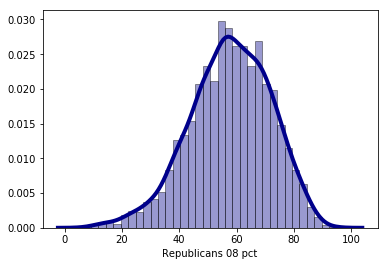

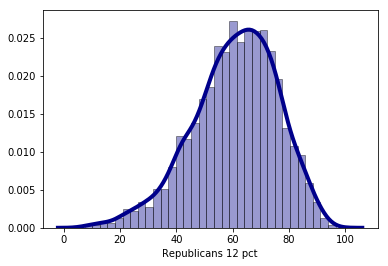

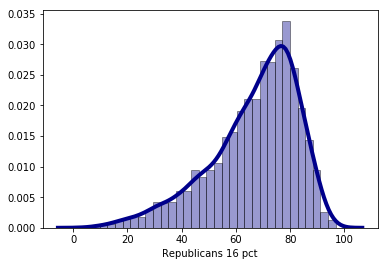

In [26]:
elections=['Republicans 08 pct', 'Republicans 12 pct', 'Republicans 16 pct']

for election in elections:
    sns.distplot(data_votes[election], hist=True, rug=False 
             ,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    plt.show();
    





- 2.1.3 What are some of the similarities and differences between the 3 elections?

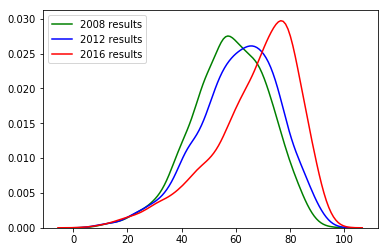

In [27]:
import seaborn as sns

sns.distplot(data_votes[['Republicans 08 pct']], hist=False, rug=False,color='green', label="2008 results")
sns.distplot(data_votes[['Republicans 12 pct']], hist=False, rug=False,color='blue', label="2012 results")
sns.distplot(data_votes[['Republicans 16 pct']], hist=False, rug=False,color='red', label="2016 results")

plt.show()

#### 2.2 Question 2
    
- 2.2.1  Repeat this exercise but now aggregate the data at a state level. (So instead of finding the vote share of a party within a county, find the vote share of a party within a state. Note: You might need to re-calculate the relative vote share for a state to take into account the different populations of each county.) Has your answer changed about the similarity of the 3 elections?

**Approach:**
 - Based on the **data_votes** dataframe, data was reorganized and grouped by state to provide the necessary organization for the query.
 
**Coding:**

- Used **groupby** to group the data by state and **.agg** to aggregate the rows belonging to the same State.
- Inside the .agg function, we called **'sum'** to sum each entry, process was done for each of the Republican Votes (2008, 2012 and 2016).
- Calculated the aggregated Vote share per election and rounded the results.
- Called the results using **.head()** to check for any possible error.

**Results:**
- Just as noticed in the distribution plots from the previous query, the results from this query, presented in Bar plots, also indicate an improvement in the performance of the Republicans from 2008 to 2016.
- Most of the states had an increase in the votes share for the Republicans, with some of the exceptions being:
    - Arizona, California, Massachussets, Texas, District of columbia, Virginia and Washington, states that have seen a decrease in Republican vote share from 2012 to 2016
- A histogram  also indicates a development to the right,  from 2008 until 2016, indicating a greater number of states with higher vote shares for the Republican party.
- Finally and later on at Question 2.3, a violin plot shows the improvement of votes shares for the Republicans accross the three elections. 

In [28]:
State_results = data_votes.groupby('State', as_index=False).agg({'Republicans 08 (Votes)':'sum', 'Republicans 12 (Votes)':'sum', 'votes16_trumpd':'sum','Democrats 08 (Votes)':'sum', 'Democrats 12 (Votes)':'sum', 'votes16_clintonh':'sum'})

State_results['Republicans_08_pct_ST'] = round(State_results['Republicans 08 (Votes)']/(State_results['Republicans 08 (Votes)']+State_results['Democrats 08 (Votes)'])*100,2)

State_results['Republicans_12_pct_ST'] = round(State_results['Republicans 12 (Votes)']/(State_results['Republicans 12 (Votes)']+State_results['Democrats 12 (Votes)'])*100,2)

State_results['Republicans_16_pct_ST'] = round(State_results['votes16_trumpd']/(State_results['votes16_trumpd']+State_results['votes16_clintonh'])*100,2)


State_results.head()

,State,Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,Democrats 08 (Votes),Democrats 12 (Votes),votes16_clintonh,Republicans_08_pct_ST,Republicans_12_pct_ST,Republicans_16_pct_ST
0,Alabama,1266546.0,1255925.0,1306925.0,813479.0,795696.0,718084.0,60.89,61.22,64.54
1,Arizona,1230111.0,1233654.0,1021154.0,1034707.0,1025232.0,936250.0,54.31,54.61,52.17
2,Arkansas,619021.0,628279.0,656602.0,414727.0,387201.0,371793.0,59.88,61.87,63.85
3,California,5011781.0,4839958.0,3916209.0,8274473.0,7854285.0,7362490.0,37.72,38.13,34.72
4,Colorado,1073629.0,1185243.0,1137455.0,1288633.0,1323101.0,1212209.0,45.45,47.25,48.41


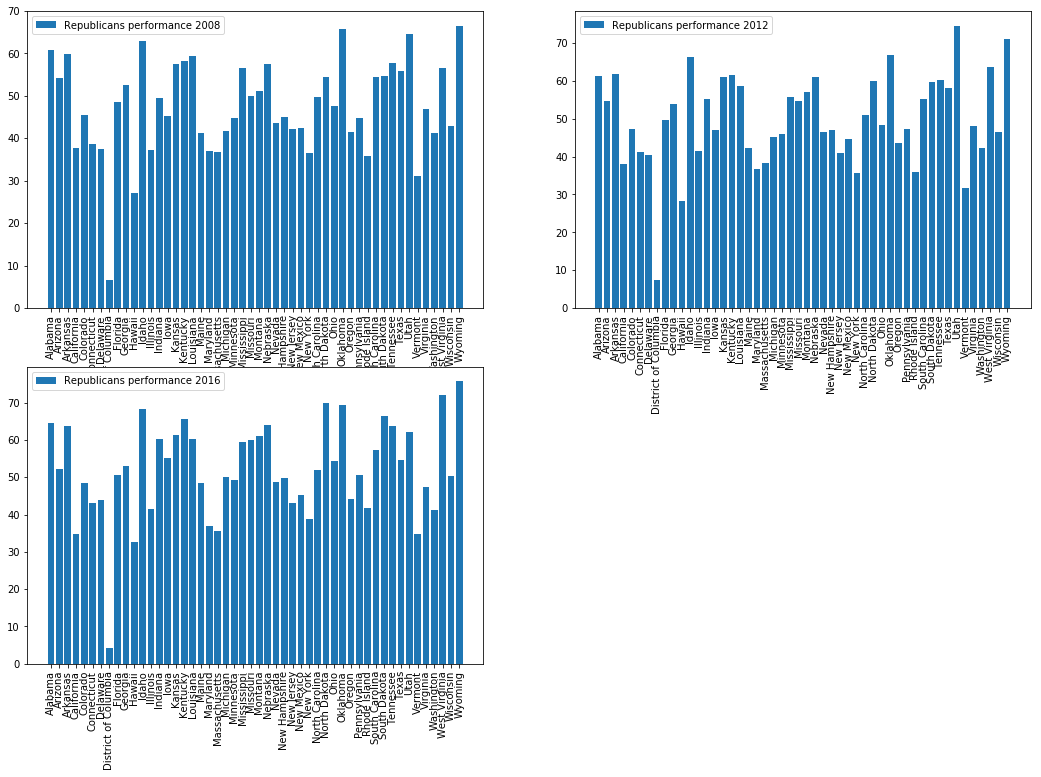

In [29]:
from matplotlib.gridspec import GridSpec

plt.figure(figsize=(18,12))
plt.subplot2grid((2,2),(0,0))
plt.bar(State_results['State'],State_results['Republicans_08_pct_ST'])
plt.xticks(rotation=90)
plt.legend(['Republicans performance 2008'])

plt.subplot2grid((2,2),(0,1))
plt.bar(State_results['State'],State_results['Republicans_12_pct_ST'])
plt.xticks(rotation=90)
plt.legend(['Republicans performance 2012'])

plt.subplot2grid((2,2),(1,0))
plt.bar(State_results['State'],State_results['Republicans_16_pct_ST'])
plt.xticks(rotation=90)
plt.legend(['Republicans performance 2016'])

plt.tight_layout;



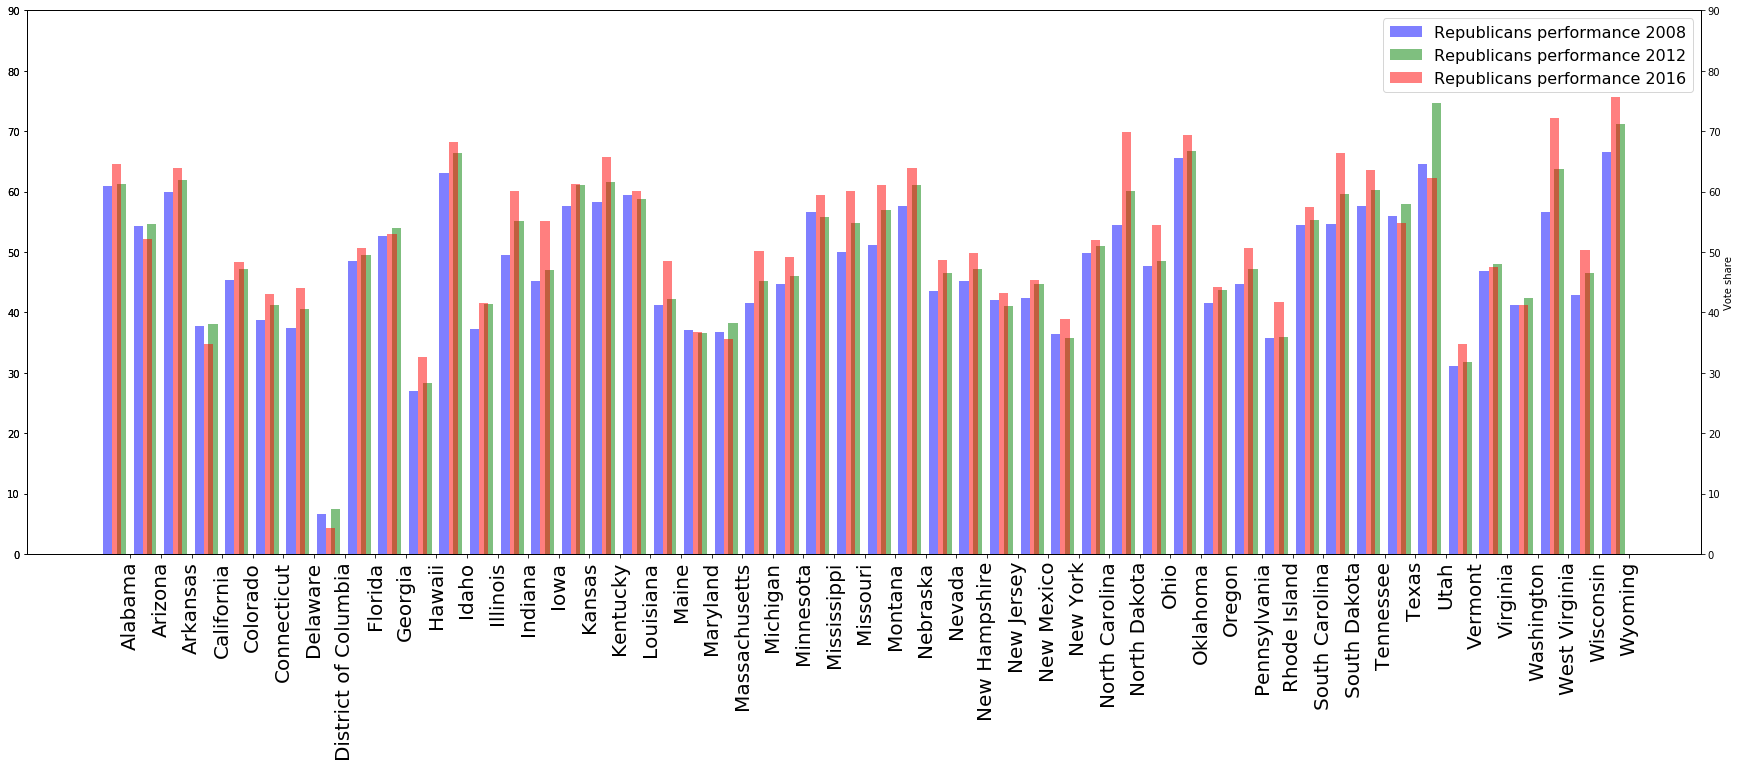

In [30]:
plt.rcParams["figure.figsize"] = [30,10]
a=len(State_results['State'].unique())
x = np.arange(a)
ax1 = plt.subplot(1,1,1)
w = 0.3
plt.rcParams["figure.figsize"]
#plt.xticks(), will label the bars on x axis with the respective state names.
plt.xticks(x + w*2.5, State_results['State'], rotation='vertical',fontsize=20)
Perf_2008_pct =ax1.bar(x, State_results['Republicans_08_pct_ST'], width=w, color='b', align='center', alpha=0.5)
plt.ylim([0, 90] )
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()
#Creating the second set of bars, now for 2012.
Perf_2012_pct =ax2.bar(x + w*1.5, State_results['Republicans_12_pct_ST'], width=w,color='g',align='center', alpha=0.5)
plt.ylim([0, 90] )
ax3 = ax2.twinx()
#Creating the third set of bars, now for 2016.
Perf_2016_pct =ax2.bar(x + w, State_results['Republicans_16_pct_ST'], width=w,color='r',align='center', alpha=0.5)
plt.ylim([0, 90] )
#Set the Y axis label as vote share.
plt.ylabel('Vote share')
#To set the legend on the plot we have used plt.legend()
plt.legend([Perf_2008_pct, Perf_2012_pct, Perf_2016_pct],['Republicans performance 2008', 'Republicans performance 2012', 'Republicans performance 2016' ], fontsize=16)
#To show the plot finally we have used plt.show().

plt.show();



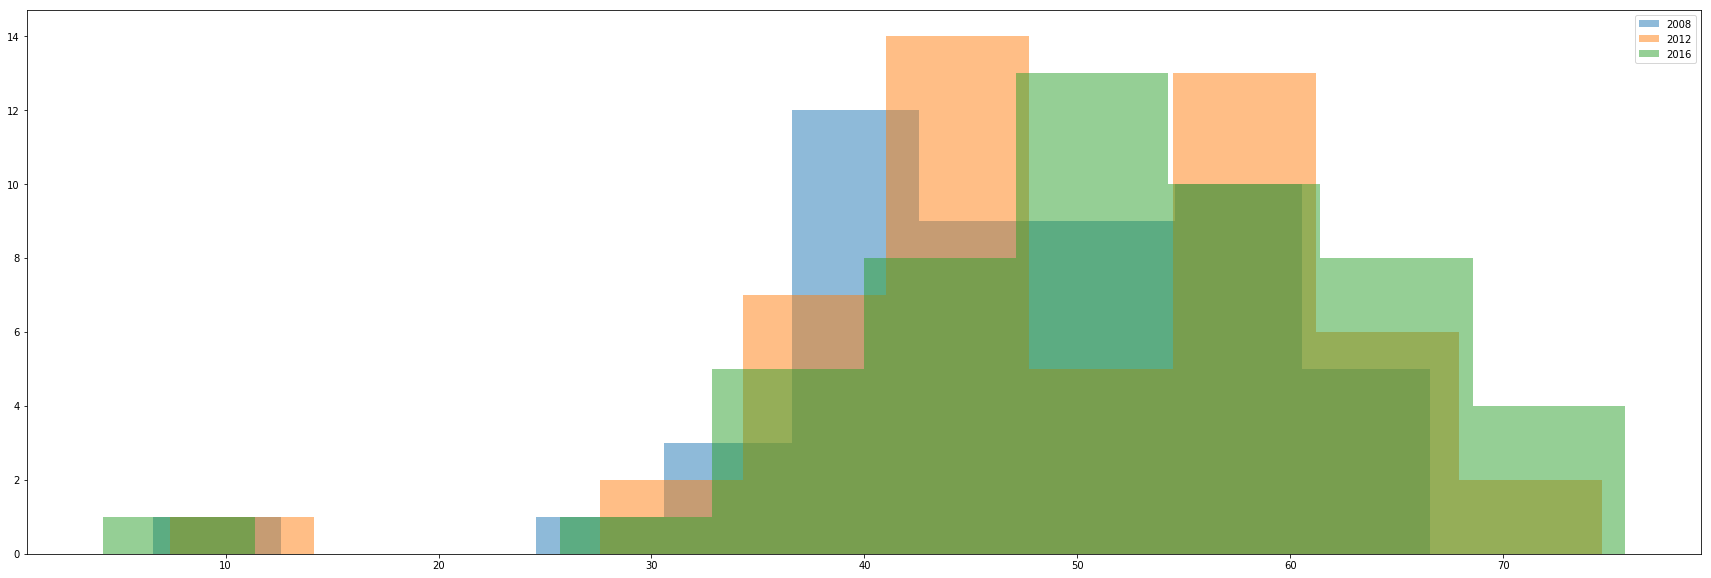

In [31]:
plt.hist(State_results['Republicans_08_pct_ST'], bins=10, alpha=0.5, label='2008')
plt.hist(State_results['Republicans_12_pct_ST'], bins=10, alpha=0.5, label='2012')
plt.hist(State_results['Republicans_16_pct_ST'], bins=10, alpha=0.5, label='2016')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 3
plt.legend(loc='upper right');

   
##### 2.3 Question 3
- 2.3.1 Look back at the non-aggregated county-level data. Conduct one or more statistical tests to see whether the mean Republican party vote share across all of the counties are different for the 3 elections (Which statistical test is appropriate here? Assume that the people who voted in each county are a representative sample of its population.) Describe why you’ve chosen your tests and interpret your results.

**Approach:**
 - Based on the **data_votes** dataframe, we created first a bar plot to represent the average vote share for the republicans at each election year, including the calculated standard deviation to give an idea of future results from the ANOVA.
 - After that, we proceeded with the ANOVA, but before that we selected the relevant data and reorganized it to allow ANOVA.
 - With ANOVA results, we moved to the Tukey test to identify which elections were statistically different from another.
 
**Coding:**

- In order to create the bar plots, we calculated the means of each vote share year, using **np.mean** and gave the results different names in order to store them.
- The same process was done for the standard deviation, using **np.std()**.
- After it the bar plot, we prepared and printed the bar plot.
- To allow ANOVA function to run, we reorganized the data using **.stack().reset_index()**.
- We printed the head of the newly created table to ensure everything was done accordingly.
- Then we moved to the ANOVA analysis using the library and function **from statsmodels.stats.anova**.
- A summary of the results was printed.
- Later, we created a violin plot.
- Finally, to specify which elections were different one from the other, we run a Tukey test.


**Results:**
- Bar plot with std gives an idea of different performance, but not enough to provide a precise conclusion.
- ANOVA indicates that a difference exists among the three election years for the vote shares of the Republican party.
- Violin plot indicates an increase in the performance of the Republicans from 2008 until 2016.
- Tukey test clarifies that differences:
    - Republicans 2008 pct **is different** than Republicans 2012 pct
    - Republicans 2008 pct **is different** than Republicans 2016 pct
    - Republicans 2012 pct **is different** than Republicans 2016 pct



In [32]:
# Calculate the average
Rep_2008_pct_mean = np.mean(data_votes['Republicans 08 pct'])
Rep_2012_pct_mean = np.mean(data_votes['Republicans 12 pct'])
Rep_2016_pct_mean = np.mean(data_votes['Republicans 16 pct'])

Rep_2008_pct_std = np.std(data_votes['Republicans 08 pct'])
Rep_2012_pct_std = np.std(data_votes['Republicans 12 pct'])
Rep_2016_pct_std = np.std(data_votes['Republicans 16 pct'])

elections_pct = ['Republicans 08 pct', 'Republicans 12 pct', 'Republicans 16 pct']
x_pos_pct = np.arange(len(elections_pct))
Rep_pct_means = [Rep_2008_pct_mean, Rep_2012_pct_mean, Rep_2016_pct_mean]
error_pct = [Rep_2008_pct_std, Rep_2012_pct_std, Rep_2016_pct_std]

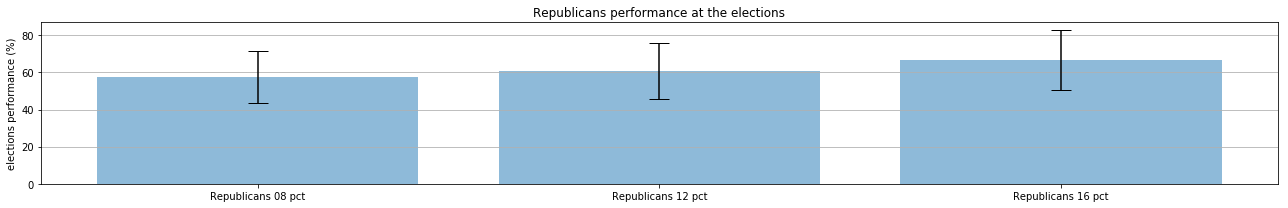

In [33]:
fig, ax = plt.subplots()
ax.bar(x_pos_pct, Rep_pct_means, yerr=error_pct, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('elections performance (%)')
ax.set_xticks(x_pos_pct)
ax.set_xticklabels(elections_pct)
ax.set_title('Republicans performance at the elections')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()

plt.show()

In [34]:
#1. Use `stack` method as well as `reset_index` to get the data frame 
#   into a suitable format for analysis. We want `long` data, with a 
#   column for the color, and a column for the response, similar to the 
#   jetlag data. Use these methods for help.
election_results=data_votes.loc[:,['Republicans 08 pct', 'Republicans 12 pct', 'Republicans 16 pct']]
stacked_data = election_results.stack().reset_index()
#stacked_data.reset_index(inplace=True)
stacked_data.columns = ["drop", "Year", "votes_pct"]
stacked_data.drop("drop", axis=1, inplace=True)
stacked_data.head()


,Year,votes_pct
0,Republicans 08 pct,59.770827
1,Republicans 12 pct,59.644008
2,Republicans 16 pct,62.659927
3,Republicans 08 pct,64.944408
4,Republicans 12 pct,67.007230


In [35]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

votes_olm = ols('votes_pct ~ Year', data=stacked_data).fit()
anova_lm(votes_olm)

,df,sum_sq,mean_sq,F,PR(>F)
Year,2.0,1.290595e+05,64529.735049,284.180496,1.575297e-120
Residual,9324.0,2.117229e+06,227.073060,NaN,NaN


In [36]:
votes_olm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              votes_pct   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     284.2
Date:                Sun, 14 Jul 2019   Prob (F-statistic):          1.58e-120
Time:                        22:12:23   Log-Likelihood:                -38534.
No. Observations:                9327   AIC:                         7.707e+04
Df Residuals:                    9324   BIC:                         7.709e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     57.7646      0.270    213.742      0.000      57.235      58.294
Year[T.Republicans 12 pct]     3.0291      0.382      7.925      0.000       2.280       3.778
Year[T.Republicans 16 pct]     8.9567      0.382     23.435      0.000       8.208       9.706
==============================================================================
Omnibus:                      537.196   Durbin-Watson:                   0.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              632.929
Skew:                          -0.622   Prob(JB):                    3.64e-138
Kurtosis:                       3.288   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

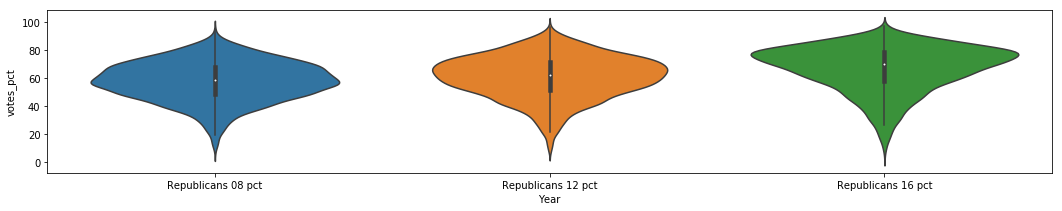

In [37]:
sns.violinplot(x = 'Year', y = 'votes_pct', data = stacked_data);

In [38]:
from statsmodels.stats import multicomp

multicomp.pairwise_tukeyhsd(stacked_data['votes_pct'], stacked_data['Year']).summary()

group1,group2,meandiff,lower,upper,reject
Republicans 08 pct,Republicans 12 pct,3.0291,2.1331,3.925,True
Republicans 08 pct,Republicans 16 pct,8.9567,8.0608,9.8526,True
Republicans 12 pct,Republicans 16 pct,5.9277,5.0317,6.8236,True
